In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# energygenerationdata = pd.read_csv("data/time_series_60min_singleindex.csv",
#                         usecols=(lambda s: s.startswith('utc') | 
#                                  s.startswith('DE_solar') |
#                                  s. startswith('DE_wind')),
#                         parse_dates=[0], index_col=0)

# wind generation is measured in MW
windgenerationdata = pd.read_csv("data/time_series_60min_singleindex.csv",
                        usecols=(lambda s: s.startswith('utc') | 
                                 s. startswith('DE_wind_generation')),
                        parse_dates=[0], index_col=0)

# solargenerationdata = pd.read_csv("data/time_series_60min_singleindex.csv",
#                         usecols=(lambda s: s.startswith('utc') | 
#                                  s.startswith('DE_solar')),
#                         parse_dates=[0], index_col=0)

In [3]:
# weatherdata = pd.read_csv("data/weather_data.csv",
#                 usecols=(lambda s: s.startswith('utc') | 
#                          s.startswith('DE')),
#                 parse_dates=[0], index_col=0)

In [4]:
windspeed = pd.read_csv("data/weather_data.csv",
                usecols=(lambda s: s.startswith('utc') | 
                         s.startswith('DE_windspeed')),
                parse_dates=[0], index_col=0)

In [5]:
windspeed

,DE_windspeed_10m
utc_timestamp,
1980-01-01 00:00:00,5.7291
1980-01-01 01:00:00,5.7234
1980-01-01 02:00:00,5.7342
1980-01-01 03:00:00,5.7345
1980-01-01 04:00:00,5.6416
1980-01-01 05:00:00,5.6070
1980-01-01 06:00:00,5.5772
1980-01-01 07:00:00,5.3745
1980-01-01 08:00:00,5.4239


In [6]:
#creating training data but cutting the data based on time stamp
# start_remove = pd.to_datetime('2016-01-01')
# end_remove = pd.to_datetime('2017-01-01')
# windspeedformatted = windspeed.loc[(windspeed.index >= start_remove)]
# windgenerationdataformatted = windgenerationdata.loc[(windgenerationdata.index >= start_remove) & (windgenerationdata.index < end_remove)]

# start_remove = pd.to_datetime('2015-01-01')
# end_remove = pd.to_datetime('2016-01-01')
# windspeedformatted = windspeed.loc[(windspeed.index >= start_remove)]
# windgenerationdataformatted = windgenerationdata.loc[(windgenerationdata.index >= start_remove) & (windgenerationdata.index < end_remove)]


# training and data set

# start_remove = pd.to_datetime('2015-01-01')
# end_remove = pd.to_datetime('2016-12-01')
# windspeedformatted = windspeed.loc[(windspeed.index >= start_remove) & (windspeed.index < end_remove)]
# windgenerationdataformatted = windgenerationdata.loc[(windgenerationdata.index >= start_remove) & (windgenerationdata.index < end_remove)]

# start_test = pd.to_datetime('2016-12-01')
# end_test = pd.to_datetime('2017-01-01')
# windspeedtest = windspeed.loc[(windspeed.index >= start_test)]
# windgenerationtest = windgenerationdata.loc[(windgenerationdata.index >= start_test) & (windgenerationdata.index < end_test)]



start_remove = pd.to_datetime('2015-01-01')
end_remove = pd.to_datetime('2016-11-01')
windspeedformatted = windspeed.loc[(windspeed.index >= start_remove) & (windspeed.index < end_remove)]
windgenerationdataformatted = windgenerationdata.loc[(windgenerationdata.index >= start_remove) & (windgenerationdata.index < end_remove)]

start_test = pd.to_datetime('2016-11-01')
end_test = pd.to_datetime('2017-01-01')
windspeedtest = windspeed.loc[(windspeed.index >= start_test)]
windgenerationtest = windgenerationdata.loc[(windgenerationdata.index >= start_test) & (windgenerationdata.index < end_test)]


In [7]:
windspeedformatted.replace([np.inf, -np.inf], 0)

,DE_windspeed_10m
utc_timestamp,
2015-01-01 00:00:00,3.3706
2015-01-01 01:00:00,3.4123
2015-01-01 02:00:00,3.4766
2015-01-01 03:00:00,3.4913
2015-01-01 04:00:00,3.5389
2015-01-01 05:00:00,3.5339
2015-01-01 06:00:00,3.5631
2015-01-01 07:00:00,3.7141
2015-01-01 08:00:00,4.1739


In [8]:
#creating test/comparison data
# start_test = pd.to_datetime('2015-01-01')
# end_test = pd.to_datetime('2016-01-01')
# windspeedtest = windspeed.loc[(windspeed.index >= start_test) & (windspeed.index < end_test)]
# windgenerationtest = windgenerationdata.loc[(windgenerationdata.index >= start_test) & (windgenerationdata.index < end_test)]

In [9]:
windspeedformatted

,DE_windspeed_10m
utc_timestamp,
2015-01-01 00:00:00,3.3706
2015-01-01 01:00:00,3.4123
2015-01-01 02:00:00,3.4766
2015-01-01 03:00:00,3.4913
2015-01-01 04:00:00,3.5389
2015-01-01 05:00:00,3.5339
2015-01-01 06:00:00,3.5631
2015-01-01 07:00:00,3.7141
2015-01-01 08:00:00,4.1739


In [10]:
windgenerationdataformatted

,DE_wind_generation_actual
utc_timestamp,
2015-01-01 00:00:00,8814.0
2015-01-01 01:00:00,9054.0
2015-01-01 02:00:00,9070.0
2015-01-01 03:00:00,9164.0
2015-01-01 04:00:00,9232.0
2015-01-01 05:00:00,9688.0
2015-01-01 06:00:00,10331.0
2015-01-01 07:00:00,10208.0
2015-01-01 08:00:00,10029.0


In [11]:
max(windgenerationdataformatted['DE_wind_generation_actual'])

33626.0

In [12]:
min(windgenerationdataformatted['DE_wind_generation_actual'])

135.0

In [13]:
windgenerationdataformatted = windgenerationdataformatted * 1e-3

In [14]:
windgenerationtest = windgenerationtest * 1e-3

In [15]:
windgenerationtest

,DE_wind_generation_actual
utc_timestamp,
2016-11-01 00:00:00,5.909
2016-11-01 01:00:00,6.431
2016-11-01 02:00:00,6.615
2016-11-01 03:00:00,6.678
2016-11-01 04:00:00,7.034
2016-11-01 05:00:00,7.856
2016-11-01 06:00:00,7.934
2016-11-01 07:00:00,7.865
2016-11-01 08:00:00,7.592


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [17]:
#train test might not be valid for our case because we have timestamps in play
# xtr, xts, ytr, yts = train_test_split(windspeedformatted,windgenerationdataformatted, test_size = 0.33)

In [18]:
#inital model training attempt
# model = LinearRegression().fit(xtr,ytr)
# predicted = model.predict(windspeedformatted)

In [19]:
#attempt at cross validation
# from sklearn.model_selection import cross_val_score

# model = LinearRegression()

# scores_wind = cross_val_score(model, windspeedformatted, windgenerationdataformatted, cv=5)
# print(scores_wind, "\naverage =", np.mean(scores_wind))

In [20]:
#predict using train test split data
# predicted = model.predict(xts)

In [21]:
# predicted

In [22]:
#error when using model from cross validation
# predicted = model.predict(windspeedformatted)

In [23]:
#timeseries used as x axis when plotting predicted
# timeseries = pd.date_range('2016-01-01', '2016-12-31 23:00:00', freq='H')

In [24]:
# timeseries

In [25]:
# windgenerationdataformatted.plot(linewidth=0.5)

In [26]:
# I think this is an invalid test because using entire dataset in the predict but the training data is from that same set
# plt.plot(timeseries,predicted, linewidth=0.5)

In [27]:
'''
Todo:
take in weather data and generation data
separate data into two sets:
Solar
X = [sun related weather columns] 
Y = wind_generation_actual
Wind:
X = [wind related weather columns] 
Y = sun_generation_actual

Trim data based on timestamp
Wind generation begins at 2010-01-01
However there are values with NaN.
No wind data past 2016
Only valid times for dataset is 2015-01-01 to 2017

Solar generation begins at 2012-01-01

To try: if there are timestamps do I have to format data?
'''

'\nTodo:\ntake in weather data and generation data\nseparate data into two sets:\nSolar\nX = [sun related weather columns] \nY = wind_generation_actual\nWind:\nX = [wind related weather columns] \nY = sun_generation_actual\n\nTrim data based on timestamp\nWind generation begins at 2010-01-01\nHowever there are values with NaN.\nNo wind data past 2016\nOnly valid times for dataset is 2015-01-01 to 2017\n\nSolar generation begins at 2012-01-01\n\nTo try: if there are timestamps do I have to format data?\n'

In [28]:
np.any(np.isnan(windspeedformatted))

False

In [29]:
np.all(np.isfinite(windspeedformatted))

True

In [30]:
windspeedformatted = windspeedformatted[~windspeedformatted.isin([np.nan, np.inf, -np.inf]).any(1)]

In [31]:
np.where(windspeedformatted.values >= np.finfo(np.float64).max)

(array([], dtype=int64), array([], dtype=int64))

In [32]:
windspeedformatted

,DE_windspeed_10m
utc_timestamp,
2015-01-01 00:00:00,3.3706
2015-01-01 01:00:00,3.4123
2015-01-01 02:00:00,3.4766
2015-01-01 03:00:00,3.4913
2015-01-01 04:00:00,3.5389
2015-01-01 05:00:00,3.5339
2015-01-01 06:00:00,3.5631
2015-01-01 07:00:00,3.7141
2015-01-01 08:00:00,4.1739


In [33]:
np.any(np.isnan(windspeedformatted))

False

In [34]:
windgenerationdataformatted

,DE_wind_generation_actual
utc_timestamp,
2015-01-01 00:00:00,8.814
2015-01-01 01:00:00,9.054
2015-01-01 02:00:00,9.070
2015-01-01 03:00:00,9.164
2015-01-01 04:00:00,9.232
2015-01-01 05:00:00,9.688
2015-01-01 06:00:00,10.331
2015-01-01 07:00:00,10.208
2015-01-01 08:00:00,10.029


In [35]:
model = LinearRegression().fit(windspeedformatted,windgenerationdataformatted)

In [36]:
#using the previously formatted data which is data from 2015
prediction = model.predict(windspeedtest)

In [40]:
timeseries = pd.date_range('2016-11-01', '2016-12-31 23:00:00', freq='H')

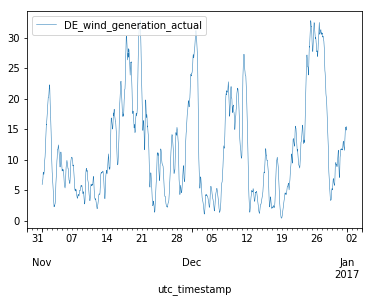

In [41]:
windgenerationtest.plot(linewidth=0.5)

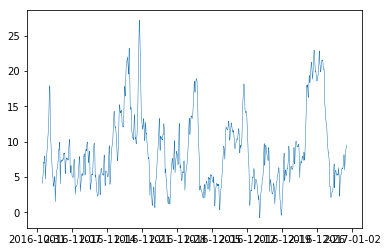

In [42]:
plt.plot(timeseries,prediction, linewidth=0.5)

In [43]:
from sklearn.metrics import r2_score
print(r2_score(windgenerationtest, prediction))

0.6057566310386304


In [44]:
#large number because we're deadling with large numbers
from sklearn.metrics import mean_squared_error
print(mean_squared_error(windgenerationtest, prediction))

27.490970897828895


In [45]:
print(np.sum((windgenerationtest-prediction)**2)/(prediction.shape[0]))

DE_wind_generation_actual    27.490971
dtype: float64


In [ ]:
'''
To do:
Figure out mse (maybe normalize)
figure out cross validation fitting
Incorportate more data (more times and more regions)

NN model experimentation

Expand to solar generation
'''